In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import pylab as pl
import numpy as np 
import pandas as pd

In [41]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics  
from sklearn import svm 
from sklearn.metrics import jaccard_score  
from sklearn.metrics import f1_score  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import DecisionTreeClassifier
import itertools

# CSV-File

In [3]:
df = pd.read_csv("output.csv",encoding = "ISO-8859-1",low_memory=False , error_bad_lines=False)
print(df.describe())
print("\nDataSet shape:"+str(df.shape))

C:\Users\ABTIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 347177: expected 3 fields, saw 4\nSkipping line 403949: expected 3 fields, saw 4\nSkipping line 404083: expected 3 fields, saw 4\nSkipping line 404245: expected 3 fields, saw 4\nSkipping line 404259: expected 3 fields, saw 4\nSkipping line 404307: expected 3 fields, saw 4\nSkipping line 404343: expected 3 fields, saw 4\nSkipping line 404615: expected 3 fields, saw 4\nSkipping line 404665: expected 3 fields, saw 4\nSkipping line 405214: expected 3 fields, saw 4\nSkipping line 405284: expected 3 fields, saw 4\nSkipping line 420842: expected 3 fields, saw 4\nSkipping line 420844: expected 3 fields, saw 4\nSkipping line 423632: expected 3 fields, saw 4\nSkipping line 458707: expected 3 fields, saw 4\nSkipping line 458835: expected 3 fiel

          ezafe_tag
count  2.602488e+06
mean   2.252375e-01
std    4.177387e-01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    1.000000e+00

DataSet shape:(2602488, 3)


In [4]:
#Remove Nan
df = df[df.notna()]
print("\nDataSet shape (Nan Free):"+str(df.shape))


DataSet shape (Nan Free):(2602488, 3)


In [5]:
#LabelEncoder --> token labling 
label = LabelEncoder() 
df.token = label.fit_transform(df.token)
print(df.token.describe())

count    2.602488e+06
mean     3.387220e+04
std      2.376402e+04
min      0.000000e+00
25%      1.258800e+04
50%      2.966200e+04
75%      5.632900e+04
max      7.679700e+04
Name: token, dtype: float64


In [6]:
#LabelEncoder --> pos_tag labling 
label = LabelEncoder() 
df.pos_tag = label.fit_transform(df.pos_tag)
print(df.pos_tag.describe())

count    2.602488e+06
mean     1.749804e+02
std      1.234888e+02
min      0.000000e+00
25%      8.000000e+01
50%      1.550000e+02
75%      2.300000e+02
max      5.490000e+02
Name: pos_tag, dtype: float64


In [7]:
print(df.ezafe_tag.describe())

count    2.602488e+06
mean     2.252375e-01
std      4.177387e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: ezafe_tag, dtype: float64


In [8]:
print(df.describe())

              token       pos_tag     ezafe_tag
count  2.602488e+06  2.602488e+06  2.602488e+06
mean   3.387220e+04  1.749804e+02  2.252375e-01
std    2.376402e+04  1.234888e+02  4.177387e-01
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    1.258800e+04  8.000000e+01  0.000000e+00
50%    2.966200e+04  1.550000e+02  0.000000e+00
75%    5.632900e+04  2.300000e+02  0.000000e+00
max    7.679700e+04  5.490000e+02  1.000000e+00


In [9]:
print('token :\n',df['token'].value_counts())
print('pos_tag :\n',df['pos_tag'].value_counts())
print('ezafe_tag :\n',df['ezafe_tag'].value_counts())
print('\nData Types:\n',df.dtypes)

token :
 64723    120557
3815      94691
28829     85716
208       84003
16927     68966
          ...  
61708         1
47984         1
56746         1
46815         1
13737         1
Name: token, Length: 76798, dtype: int64
pos_tag :
 156    324139
155    312673
297    259674
80     256441
27     161068
        ...  
355         1
456         1
412         1
336         1
135         1
Name: pos_tag, Length: 550, dtype: int64
ezafe_tag :
 0    2016310
1     586178
Name: ezafe_tag, dtype: int64

Data Types:
 token        int32
pos_tag      int32
ezafe_tag    int64
dtype: object


Seperate Inputs and Outputs

[[<AxesSubplot:title={'center':'pos_tag'}>
  <AxesSubplot:title={'center':'token'}>]]


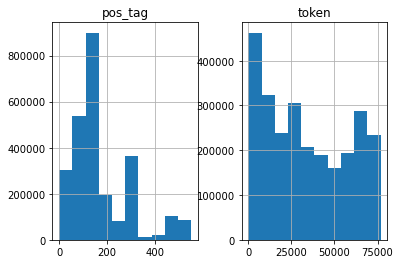

In [10]:
Inputs = df[{'token','pos_tag'}]
print(Inputs.hist())

In [11]:
#Normalize Data
scaler = preprocessing.StandardScaler().fit(Inputs)
Inputs = scaler.transform(Inputs.astype(float))
print("Normalized Data:\n",Inputs)

Normalized Data:
 [[ 1.08527792 -1.41963405]
 [-0.76914196 -1.41727754]
 [ 0.324075    0.82165395]
 ...
 [-1.26311407  0.24489954]
 [ 2.55909634 -1.10079061]
 [-0.76914196 -1.41660426]]


[[<AxesSubplot:title={'center':'ezafe_tag'}>]]


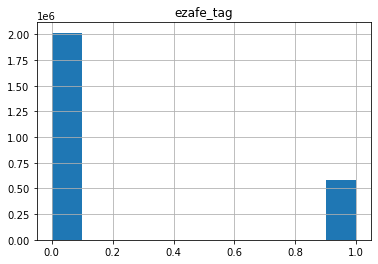

In [12]:
Outputs = df[{'ezafe_tag'}]
print(Outputs.hist())

such a big data ! 
Lets divide ourr DataSet To 8 set for KNN (K=4) Algorithm

# KNN-Classification

First Train set Accuracy:  0.9993862108429691
First Test set Accuracy:  0.99864

Second Train set Accuracy:  0.9993510458391809
Second Test set Accuracy:  0.99816

Third Train set Accuracy:  0.9994213758467573
Third Test set Accuracy:  0.99784

Fourth Train set Accuracy:  0.9993606362947595
Fourth Test set Accuracy:  0.9984

Fifth Train set Accuracy:  0.9994853122172813
Fifth Test set Accuracy:  0.998

Sixth Train set Accuracy:  0.9994373599393883
Sixth Test set Accuracy:  0.99808

Seventh Train set Accuracy:  0.9993894076614953
Seventh Test set Accuracy:  0.9976

Eigth Train set Accuracy:  0.9993989981170739
Eigth Test set Accuracy:  0.99792

Test set Accuracy(Average): 0.99808

In [13]:
test_and_train = 0.0384247689
X_train, X_test, y_train, y_test = train_test_split(Inputs[0:325311],Outputs[0:325311], test_size=test_and_train, random_state=4)
print ('First Train set:', X_train.shape,  y_train.shape)
print ('First Test set:', X_test.shape,  y_test.shape)

First Train set: (312811, 2) (312811, 1)
First Test set: (12500, 2) (12500, 1)


In [14]:
neighbours = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
yhat = neighbours.predict(X_test)
print("First Train set Accuracy: ", metrics.accuracy_score(y_train, neighbours.predict(X_train)))
print("First Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

C:\Users\ABTIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


First Train set Accuracy:  0.9993862108429691
First Test set Accuracy:  0.99864


In [39]:
X_train, X_test, y_train, y_test = train_test_split(Inputs[325311:650622],Outputs[325311:650622], test_size=test_and_train, random_state=4)
print ('Second Train set:', X_train.shape,  y_train.shape)
print ('Second Test set:', X_test.shape,  y_test.shape)

Second Train set: (312811, 2) (312811, 1)
Second Test set: (12500, 2) (12500, 1)


In [40]:
neighbours = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
yhat = neighbours.predict(X_test)
print("Second Train set Accuracy: ", metrics.accuracy_score(y_train, neighbours.predict(X_train)))
print("Second Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

C:\Users\ABTIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Second Train set Accuracy:  0.9993510458391809
Second Test set Accuracy:  0.99816


In [41]:
X_train, X_test, y_train, y_test = train_test_split(Inputs[650622:975933],Outputs[650622:975933], test_size=test_and_train, random_state=4)
print ('Third Train set:', X_train.shape,  y_train.shape)
print ('Third Test set:', X_test.shape,  y_test.shape)

Third Train set: (312811, 2) (312811, 1)
Third Test set: (12500, 2) (12500, 1)


In [42]:
neighbours = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
yhat = neighbours.predict(X_test)
print("Third Train set Accuracy: ", metrics.accuracy_score(y_train, neighbours.predict(X_train)))
print("Third Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

C:\Users\ABTIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Third Train set Accuracy:  0.9994213758467573
Third Test set Accuracy:  0.99784


In [43]:
X_train, X_test, y_train, y_test = train_test_split(Inputs[975933:1301244],Outputs[975933:1301244], test_size=test_and_train, random_state=4)
print ('Fourth Train set:', X_train.shape,  y_train.shape)
print ('Fourth Test set:', X_test.shape,  y_test.shape)

Fourth Train set: (312811, 2) (312811, 1)
Fourth Test set: (12500, 2) (12500, 1)


In [44]:
neighbours = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
yhat = neighbours.predict(X_test)
print("Fourth Train set Accuracy: ", metrics.accuracy_score(y_train, neighbours.predict(X_train)))
print("Fourth Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

C:\Users\ABTIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Fourth Train set Accuracy:  0.9993606362947595
Fourth Test set Accuracy:  0.9984


In [45]:
X_train, X_test, y_train, y_test = train_test_split(Inputs[1301244:1626555],Outputs[1301244:1626555], test_size=test_and_train, random_state=4)
print ('Fifth Train set:', X_train.shape,  y_train.shape)
print ('Fifth Test set:', X_test.shape,  y_test.shape)

Fifth Train set: (312811, 2) (312811, 1)
Fifth Test set: (12500, 2) (12500, 1)


In [46]:
neighbours = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
yhat = neighbours.predict(X_test)
print("Fifth Train set Accuracy: ", metrics.accuracy_score(y_train, neighbours.predict(X_train)))
print("Fifth Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

C:\Users\ABTIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Fifth Train set Accuracy:  0.9994853122172813
Fifth Test set Accuracy:  0.998


In [15]:
X_train, X_test, y_train, y_test = train_test_split(Inputs[1626555:1951866],Outputs[1626555:1951866], test_size=test_and_train, random_state=4)
print ('Sixth Train set:', X_train.shape,  y_train.shape)
print ('Sixth Test set:', X_test.shape,  y_test.shape)

Sixth Train set: (312811, 2) (312811, 1)
Sixth Test set: (12500, 2) (12500, 1)


In [16]:
neighbours = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
yhat = neighbours.predict(X_test)
print("Sixth Train set Accuracy: ", metrics.accuracy_score(y_train, neighbours.predict(X_train)))
print("Sixth Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

C:\Users\ABTIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Sixth Train set Accuracy:  0.9994373599393883
Sixth Test set Accuracy:  0.99808


In [17]:
X_train, X_test, y_train, y_test = train_test_split(Inputs[1951866:2277177],Outputs[1951866:2277177], test_size=test_and_train, random_state=4)
print ('Seventh Train set:', X_train.shape,  y_train.shape)
print ('Seventh Test set:', X_test.shape,  y_test.shape)

Seventh Train set: (312811, 2) (312811, 1)
Seventh Test set: (12500, 2) (12500, 1)


In [18]:
neighbours = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
yhat = neighbours.predict(X_test)
print("Seventh Train set Accuracy: ", metrics.accuracy_score(y_train, neighbours.predict(X_train)))
print("Seventh Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

C:\Users\ABTIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Seventh Train set Accuracy:  0.9993894076614953
Seventh Test set Accuracy:  0.9976


In [19]:
X_train, X_test, y_train, y_test = train_test_split(Inputs[2277177:2602488],Outputs[2277177:2602488], test_size=test_and_train, random_state=4)
print ('Eigth Train set:', X_train.shape,  y_train.shape)
print ('Eigth Test set:', X_test.shape,  y_test.shape)

Eigth Train set: (312811, 2) (312811, 1)
Eigth Test set: (12500, 2) (12500, 1)


In [20]:
neighbours = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
yhat = neighbours.predict(X_test)
print("Eigth Train set Accuracy: ", metrics.accuracy_score(y_train, neighbours.predict(X_train)))
print("Eigth Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

C:\Users\ABTIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Eigth Train set Accuracy:  0.9993989981170739
Eigth Test set Accuracy:  0.99792


# Logistic-Regression-Classification

jaccard index: 0.7727
f1_score: 0.6736224854741356

In [28]:
def LogeseticRegConfusionMatrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(Inputs,Outputs, test_size=test_and_train, random_state=4)
LogesticReg = LogisticRegression(solver='liblinear').fit(X_train,y_train)  
yhat = LogesticReg.predict(X_test)
print (classification_report(y_test, yhat))
print("jaccard index:",jaccard_score(y_test, yhat,pos_label=0))
print("f1_score:",f1_score(y_test, yhat, average='weighted'))

C:\Users\ABTIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ABTIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABTIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABTIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Pre

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     77270
           1       0.00      0.00      0.00     22730

    accuracy                           0.77    100000
   macro avg       0.39      0.50      0.44    100000
weighted avg       0.60      0.77      0.67    100000

jaccard index: 0.7727
f1_score: 0.6736224854741356


Confusion matrix, without normalization
[[    0 22730]
 [    0 77270]]


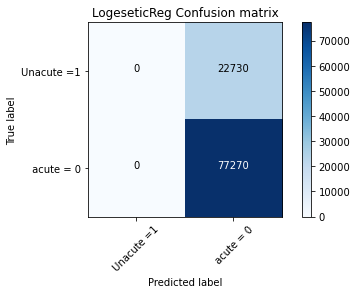

In [37]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
LogeseticRegConfusionMatrix(cnf_matrix, classes=['Unacute =1',' acute = 0'],normalize= False,  title='LogeseticReg Confusion matrix')

# Decision-Trees-Classification

DecisionTrees's Accuracy:  0.96487

In [39]:
X_train, X_test, y_train, y_test = train_test_split(Inputs,Outputs, test_size=test_and_train, random_state=4)

In [43]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)
predictTree = drugTree.predict(X_test)
print("Results: \n",y_test[0:20])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predictTree))

Results: 
          ezafe_tag
414789           0
1922355          0
944440           0
2470910          0
1312855          0
812932           0
2592120          0
1642939          1
1702             0
2384022          0
893713           0
999450           1
1836698          0
374997           0
1367029          0
940306           0
20134            0
127880           0
476634           0
1257420          0
DecisionTrees's Accuracy:  0.96487
